<img src="images/python-logo-master.png" style="width:25%;height:25%"></img>
# Advanced Python
## Data Visualization

>**Hardik I. Parikh, PhD**  
>**School of Medicine Research Computing**  
>**University of Virginia**  
>**08/09/2018**  
>hiparikh@virginia.edu

---

## Jake van der Plas, PyCon 2017
<img src="https://pbs.twimg.com/media/DBplpP_VYAA0rS5.jpg" alt="" style="width: 600px;"/>



## Today's Goals:  

#### Impossible to cover everything 

- ~~Which chart to choose???~~
- Basic syntax 
- Popular visualization libraries
    - [Matplotlib v2](https://matplotlib.org/index.html)
    - [Seaborn](https://seaborn.pydata.org/)
    - Demo [Bokeh](https://bokeh.pydata.org/en/latest/) (If time permits ...)

## Our Dataset: National Health and Nutrition Examination Survey (NHANES)

[CDC HomePage](https://www.cdc.gov/nchs/nhanes/)  

NHANES is a research program designed to assess the health and nutritional status of adults and children in the United States. The survey is one of the only to combine both survey questions and physical examinations. It began in the 1960s and since 1999 examines a nationally representative sample of about 5,000 people each year. The NHANES interview includes demographic, socioeconomic, dietary, and health-related questions. The physical exam includes medical, dental, and physiological measurements, as well as several standard laboratory tests. NHANES is used to determine the prevalence of major diseases and risk factors for those diseases. NHANES data are also the basis for national standards for measurements like height, weight, and blood pressure. Data from this survey is used in epidemiology studies and health sciences research, which help develop public health policy, direct and design health programs and services, and expand the health knowledge for the Nation.

We are using a small slice of this data. We're only using a handful of variables from the 2011-2012 survey years on about 5,000 individuals. The CDC uses a sampling strategy to purposefully oversample certain subpopulations like racial minorities. Naive analysis of the original NHANES data can lead to mistaken conclusions because the percentages of people from each racial group in the data are different from general population. The 5,000 individuals here are resampled from the larger NHANES study population to undo these oversampling effects, so you can treat this as if it were a simple random sample from the American population.

## Matplotlib Basics

**Matplotlib** is the whole package!  

**`matplotlib.pyplot`** is a module in matplotlib for plotting  

**`pylab`** is a convenience module imports 
    - matplotlib.pyplot (for plotting), and 
    - numpy (for mathematics and working with arrays) 
    in a single name space.  
    
#### Import modules    

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#import pylab 
#equivalent to above two statements

# import other modules 
import pandas as pd

# import seaborn
import seaborn as sns


### Anatomy of Plot

[Matplotlib Usage](https://matplotlib.org/faq/usage_faq.html)

<img src="https://matplotlib.org/_images/anatomy1.png" alt="" style="width: 500px;"/>

### Figure

This is the **whole** figure!  
It keeps track of all the child _Axes_, special _Artists_, and the _Canvas_

### Axes and Axis

**Axes:**  This is the actual plot, the region of the image with data space.  

**Axis:**  This takes care of the data limits. 

<Figure size 432x288 with 0 Axes>

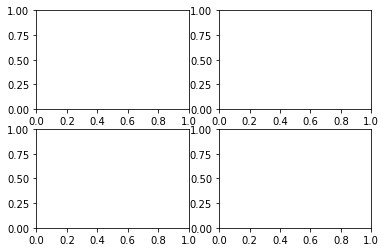

In [2]:
# empty figure
fig = plt.figure()

# empty figure with 4 Axes
fig, ax = plt.subplots(2,2)

### Artist

Every object on the figure is an _Artist_ (figure, axes, axis, line, labels, etc...). When the figure is rendered, all artists are drawn to the figure.  

## A simple plot

#### `PyPlot` style coding

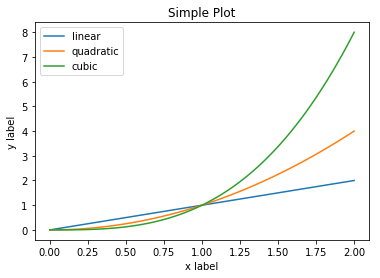

In [3]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

#### Plot-component style coding

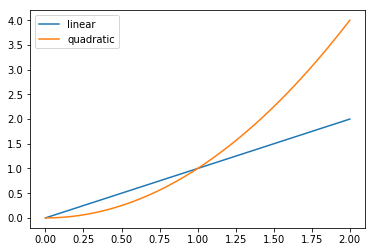

In [4]:
# data for plot
x = np.linspace(0,2, 100)                      

# create a plot
fig = plt.figure()

# add components 
fig = fig.add_subplot(1,1,1)
fig.plot(x, x, label='linear')
fig.plot(x, x**2, label='quadratic')
fig.legend()
plt.show()

#### Multiplot figure: `subplot` 

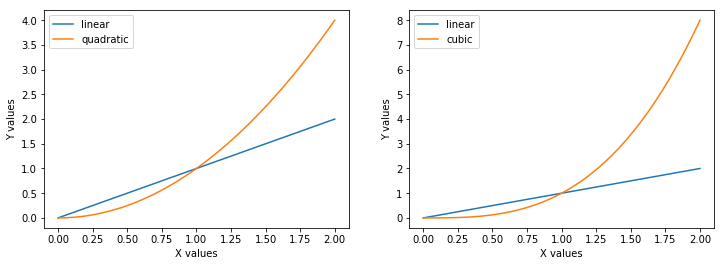

In [22]:
# subplots function 
fig, ax = plt.subplots(1,2)

# This returns a figure with 2 axes arranged in 1 row and 2 columns
# ax is the list of axes ordered by row from upper left to lower right

# add components to first figure
ax[0].plot(x, x, label="linear")
ax[0].plot(x, x**2, label="quadratic")
ax[0].legend()
ax[0].set_xlabel("X values")
ax[0].set_ylabel("Y values")

# add components to second figure
ax[1].plot(x, x, label="linear")
ax[1].plot(x, x**3, label="cubic")
ax[1].legend()
ax[1].set_xlabel("X values")
ax[1].set_ylabel("Y values")

# increase overall figure size
fig.set_size_inches(12, 4)    

plt.show()

## Read Data in

In [6]:
# read the data as pandas dataframe 
nh = pd.read_csv("../pythonAdv_Pandas/nhanes_long.csv")

nh.head()
#nh.describe()

,id,visit_num,Age,Income,Poverty,HomeRooms,Weight,Height,BMI,Pulse,...,Testosterone,HDLChol,TotChol,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActiveDays,AlcoholDay,AlcoholYear
count,5000.000000,5000.000000,5000.000000,4623.000000,4675.000000,4972.000000,4969.000000,4841.000000,4834.00000,4282.000000,...,4126.000000,4225.000000,4225.000000,307.000000,1265.000000,1168.00000,3834.000000,2386.000000,2497.00000,2984.000000
mean,67027.600800,1.577600,36.708000,57077.655202,2.761161,6.192679,70.327692,161.528672,26.44427,73.633816,...,197.898000,1.361034,4.830888,47.609121,2.924111,2.37500,6.906103,3.819363,2.92511,74.856903
std,2830.800124,0.952344,22.561794,33489.760642,1.692700,2.389182,28.800933,20.475889,7.27919,12.140440,...,226.504485,0.376694,1.066179,16.422037,1.608107,1.26442,1.325481,1.837091,3.49387,102.225569
min,62163.000000,1.000000,0.000000,2500.000000,0.000000,1.000000,3.600000,83.800000,12.90000,40.000000,...,0.250000,0.410000,1.530000,1.000000,1.000000,0.00000,2.000000,1.000000,1.00000,0.000000
25%,64543.500000,1.000000,17.000000,30000.000000,1.190000,4.000000,55.400000,156.500000,21.50000,66.000000,...,17.700000,1.090000,4.060000,39.000000,2.000000,2.00000,6.000000,2.000000,1.00000,3.000000
50%,67039.000000,1.000000,36.000000,50000.000000,2.600000,6.000000,72.100000,165.600000,25.80000,72.000000,...,43.820000,1.290000,4.730000,50.000000,3.000000,2.00000,7.000000,4.000000,2.00000,24.000000
75%,69509.000000,2.000000,54.000000,100000.000000,4.760000,8.000000,88.100000,174.200000,30.60000,82.000000,...,362.410000,1.580000,5.510000,57.000000,4.000000,3.00000,8.000000,5.000000,3.00000,104.000000
max,71915.000000,8.000000,80.000000,100000.000000,5.000000,13.000000,198.700000,200.400000,80.60000,136.000000,...,1795.600000,4.030000,12.280000,80.000000,13.000000,11.00000,12.000000,7.000000,82.00000,364.000000


## Histograms

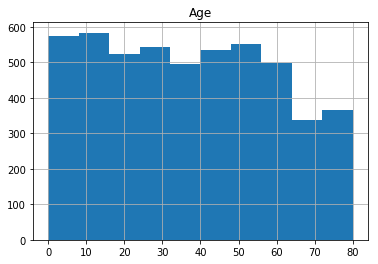

In [9]:
# plot the distribution of Age 

### Method1: Visualize in Pandas
nh.hist(column='Age')         # plotting from the dataframe; 10 bins by default, many options
plt.show()  

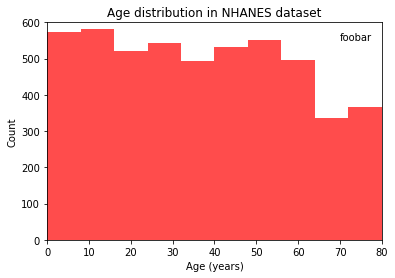

In [26]:
### Method2: Matplotlib
plt.hist(nh['Age'], bins=10, facecolor="r", alpha=0.7)  # plot type
plt.xlabel("Age (years)")  # Xaxis label
plt.ylabel("Count")  # Yaxis label
plt.title("Age distribution in NHANES dataset")  # add title
plt.axis([0,80,0,600])  # x-axis, y-axis limits
plt.text(70, 550,"foobar")  # add text to plot at specified location
plt.grid(False)
plt.show()

/Users/hp7d/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


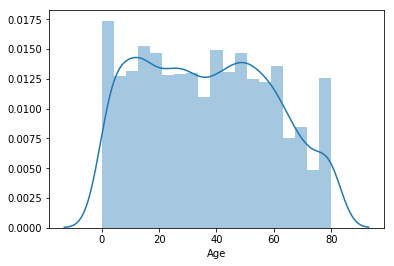

In [11]:
### Method3: Seaborn
# Seaborn: "high-level" plotting library 
# It has a collection of pre-built complex figures
sns.distplot(nh['Age']);

### Overlay plots

#### Let's visualize distribution of Age by Gender

In [14]:
### Create separate data series by Gender
nh_male = nh[nh.Gender == "male"]
nh_female = nh[nh.Gender == "female"]

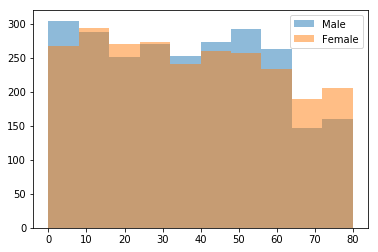

In [20]:
### Overlay plots using matplotlib

# define uniform bins for both plots
bins = range(0,81,80//10)

# plot the first histogram
plt.hist(nh_male['Age'], bins = bins, alpha = 0.5, label = "Male")

# second histogram goes on same axes
plt.hist(nh_female['Age'], bins = bins, alpha = 0.5, label = "Female")

plt.legend()

plt.show()

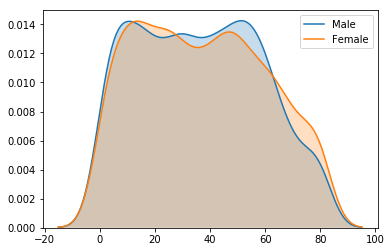

In [23]:
### Overlay kde plots using Seaborn

sns.kdeplot(nh_male['Age'], label='Male', shade=True)
sns.kdeplot(nh_female['Age'], label='Female', shade=True);  # label creates legend

#### Plot them side-by-side

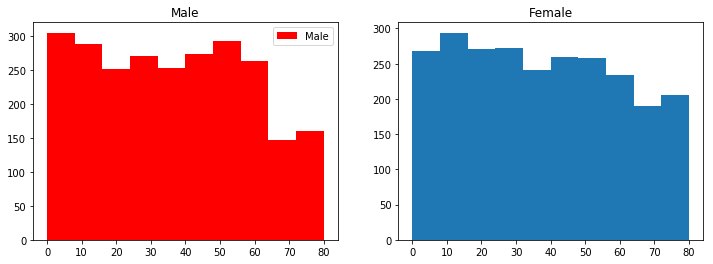

In [30]:
# We have already done this, lets repeat 

fig, ax = plt.subplots(1, 2)

ax[0].hist(nh_male['Age'], bins=bins, facecolor="r", label="Male")
ax[1].hist(nh_female['Age'], bins=bins, label="Female")
ax[0].set_title("Male")
ax[1].set_title("Female")

# increase overall figure size
fig.set_size_inches(12, 4)    

plt.show()

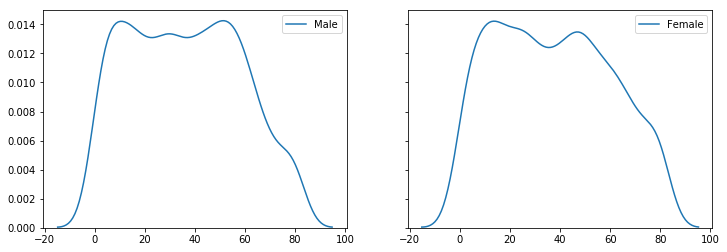

In [31]:
### kde plots using Seaborn side-by-side

fig, ax = plt.subplots(ncols=2, sharex = True, sharey = True)    # shared axis limits
fig.set_size_inches(12, 4)
sns.kdeplot(nh_male['Age'], label="Male", ax=ax[0])
sns.kdeplot(nh_female['Age'], label="Female", ax=ax[1])
plt.show()

## Scatter plots

Let's plot the relationship between two continuous variables: Age and Height

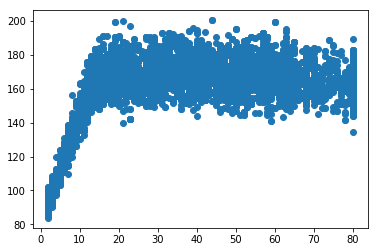

In [35]:
# plot using pyplot 

plt.scatter(nh['Age'], nh['Height'])
plt.show()

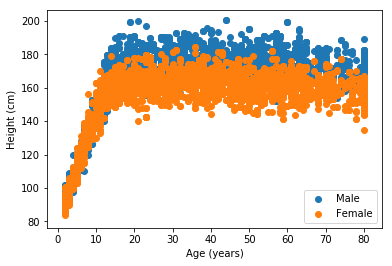

In [39]:
# plot data from two series
plt.scatter(nh_male['Age'], nh_male['Height'], label="Male")
plt.scatter(nh_female['Age'], nh_female['Height'], label="Female")
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')s
plt.legend()
plt.show()


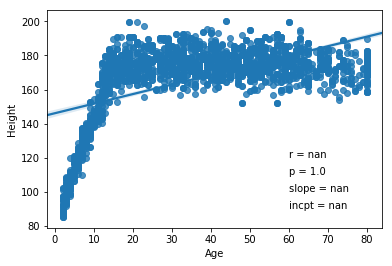

In [61]:
# scatter plots using seaborn, with
# linear regression  

import scipy.stats

# fit a 1st order polynomial (linear )
slope, intercept = np.polyfit(nh_male['Age'], nh_male['Height'], 1)
# get pearson r and p-value
r, p = scipy.stats.pearsonr(nh_male['Age'], nh_male['Height'])

# now lets plot
regPlot = sns.regplot(x='Age', y='Height', data = nh_male)
regPlot.text(60, 120, "r = " + str(round(r, 2)))                
regPlot.text(60, 110, "p = " + str(round(p, 4)))
regPlot.text(60, 100, "slope = " + str(round(slope, 2)))
regPlot.text(60, 90, "incpt = " + str(round(intercept, 2)));
plt.show()


### Exercise: 

Explore the relationship between Testosterone levels and Age by  
- for men >65 and <80 years old
- color points by gender

## Bar plots

Let's plot the relationship between discrete X and continuous Y 

In [69]:
# pandas processing

means = nh.groupby('SmokingStatus')['BMI'].mean()  # group data by gender
sds = nh.groupby('SmokingStatus')['BMI'].std()     # calculate std dev
xpos = np.arange(len(means))                # x positions
names = means.index                         # create index
means

SmokingStatus
Current    27.391354
Former     29.164912
Never      28.855805
Name: BMI, dtype: float64

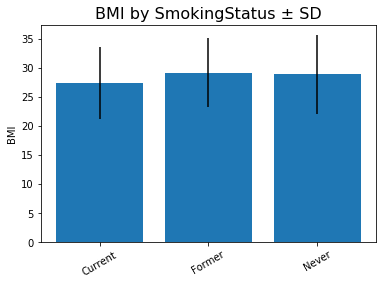

In [72]:
# Vertical bar graph
plt.bar(xpos, means, yerr=sds)
plt.title("BMI by SmokingStatus ± SD", fontsize=16)
plt.ylabel("BMI")
plt.xticks(xpos, names, rotation=30);  

## Box plots

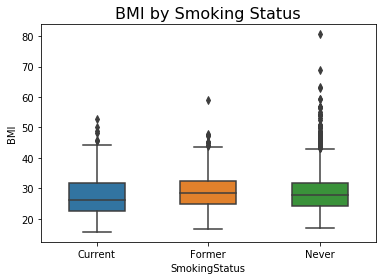

In [80]:
# Statistical plots with Seaborn 
fig = sns.boxplot(data=nh, x="SmokingStatus", order=names, y="BMI", width=0.5)
fig.set_title("BMI by Smoking Status", fontsize=16)
plt.show()

## Swarm plots

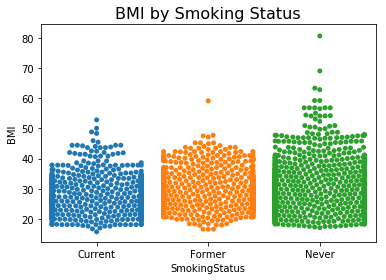

In [79]:
# swarm plots with Seaborn
fig = sns.swarmplot(data=nh, x="SmokingStatus", order=names, y="BMI")
fig.set_title("BMI by Smoking Status", fontsize=16)
plt.show()

## Heatmaps

## Interactive graphics with Bokeh

### Credit: 
James H. Harrison, Jr., MD PhD  
Division of Biomedical Informatics  
Dept. of Public Health Sciences  
University of Virginia  
April 4, 2018

- Does not use matplotlib, produces graphics for display
- Can also save to html files that are interactive, or static png/svg
- Creates a combination of javascript and CSS to support interactivity
- Multiple graphs can have linked interactivity

In [81]:
# set up bokeh
from bokeh.plotting import figure, output_notebook, show
output_notebook()    # direct output to the Jupyter notebook
# for export to png or svg files, see https://bokeh.pydata.org/en/latest/docs/user_guide/export.html

Loading BokehJS ...

In [82]:
### Import test data
from bokeh.sampledata.autompg import autompg as auto_data   # a pandas dataframe
auto_data.tail() 

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
391,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [85]:
#Scatter plot of horsepower vs. mileage

p = figure(width=600, plot_height=400, title="Horsepower vs. Mileage in Automobiles") # create figure
p.circle(x=auto_data['mpg'], y=auto_data['hp'], size=8, alpha=0.6)                    # plot data on figure (alpha is transparency)
p.xaxis.axis_label="Miles Per Gallon"                                                 # add labels to figure
p.yaxis.axis_label="Horsepower"
show(p)


In [86]:
# Scatter plot with categories of data and legend

four = auto_data[auto_data['cyl']==4]    # data for 4-cyl cars
six = auto_data[auto_data['cyl']==6]     # data for 6-cyl cars
eight = auto_data[auto_data['cyl']==8]   # data for 8-cyl cars

p = figure(width=600, plot_height=300, title="Horsepower vs. Mileage in Automobiles")
# plot 3 data series in the figure, in different colors and with legends
p.circle(x=four['mpg'], y=four['hp'], size=8, alpha=0.4, color='red', legend='4 cyl')
p.circle(x=six['mpg'], y=six['hp'], size=8, alpha=0.6, color='green', legend='6 cyl')
p.circle(x=eight['mpg'], y=eight['hp'], size=8, alpha=0.6, color='blue', legend ='8 cyl')

p.xaxis.axis_label="Miles Per Gallon"
p.yaxis.axis_label="Horsepower"
show(p)

In [87]:
# Two graphs with linked selection

from bokeh.models import ColumnDataSource   # data source for linked graphs
from bokeh.layouts import gridplot          # layout tools for multiple plots

# create a common data source for both graphs using the ColumnDataSource class
source = ColumnDataSource(data = {'x1': auto_data['mpg'], 'x2': auto_data['accel'], 
                                  'y1': auto_data['hp'], 'y2': auto_data['weight']})  # dictionary of columns

TOOLS = "box_select, lasso_select, reset"   # select a useful subset of interactive tools
# left side plot
L = figure(width=400, plot_height=400, title="Horsepower vs. Mileage", tools=TOOLS)
L.circle(x='x1', y='y1', source=source, size=8, alpha=0.6)
L.xaxis.axis_label="Miles Per Gallon"
L.yaxis.axis_label="Horsepower"
# right side plot
R = figure(width=400, plot_height=400, title="Weight vs. Acceleration", tools=TOOLS)
R.circle(x='x2', y='y2', source=source, size=8, alpha=0.6)
R.xaxis.axis_label="Acceleration"
R.yaxis.axis_label="Weight"

p = gridplot([[L, R]])  # gridplot handles multiple figures in rows & cols
show(p)

### Useful Links: 

- [Matplotlib Usage](https://matplotlib.org/faq/usage_faq.html)
- [Matplotlib Tutorials](https://matplotlib.org/tutorials/index.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/)
